In [330]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Extract Crytocurrency Data

In [331]:
cryptocurrencies = ['BTC-USD', 'ETH-USD']

In [332]:
data = yf.download(cryptocurrencies, start='2018-02-01', end='2024-02-23')
data.head()

[*********************100%%**********************]  2 of 2 completed


Adj Close                     Close                       High  \
                BTC-USD      ETH-USD      BTC-USD      ETH-USD       BTC-USD   
Date                                                                           
2018-02-01  9170.540039  1036.790039  9170.540039  1036.790039  10288.799805   
2018-02-02  8830.750000   915.784973  8830.750000   915.784973   9142.280273   
2018-02-03  9174.910156   964.018982  9174.910156   964.018982   9430.750000   
2018-02-04  8277.009766   834.682007  8277.009766   834.682007   9334.870117   
2018-02-05  6955.270020   697.950989  6955.270020   697.950989   8364.839844   

                                 Low                      Open               \
                ETH-USD      BTC-USD     ETH-USD       BTC-USD      ETH-USD   
Date                                                                          
2018-02-01  1161.349976  8812.280273  984.818970  10237.299805  1119.369995   
2018-02-02  1035.770020  7796.490234  757.979980   9142.280273  1035.770020   
2018-02-03   991.942993  8251.629883  847.690002   8852.120117   919.210999   
2018-02-04   969.031982  8031.220215  805.064026   9175.700195   964.666992   
2018-02-05   856.645996  6756.680176  644.598999   8270.540039   834.958008   

                 Volume              
                BTC-USD     ETH-USD  
Date                                 
2018-02-01   9959400448  5261680128  
2018-02-02  12726899712  6713290240  
2018-02-03   7263790080  3243480064  
2018-02-04   7073549824  2997090048  
2018-02-05   9285289984  4269530112

In [333]:
data.isnull().any()

Adj Close  BTC-USD    False
           ETH-USD    False
Close      BTC-USD    False
           ETH-USD    False
High       BTC-USD    False
           ETH-USD    False
Low        BTC-USD    False
           ETH-USD    False
Open       BTC-USD    False
           ETH-USD    False
Volume     BTC-USD    False
           ETH-USD    False
dtype: bool

In [334]:
adj_close=data['Adj Close']

bitcoin_prices = adj_close['BTC-USD']
print(bitcoin_prices.head())
ethereum_prices = adj_close['ETH-USD']
print(ethereum_prices.head())

Date
2018-02-01    9170.540039
2018-02-02    8830.750000
2018-02-03    9174.910156
2018-02-04    8277.009766
2018-02-05    6955.270020
Name: BTC-USD, dtype: float64
Date
2018-02-01    1036.790039
2018-02-02     915.784973
2018-02-03     964.018982
2018-02-04     834.682007
2018-02-05     697.950989
Name: ETH-USD, dtype: float64


In [328]:
len(adj_close.index)

2213

# Adjusted Closing Price

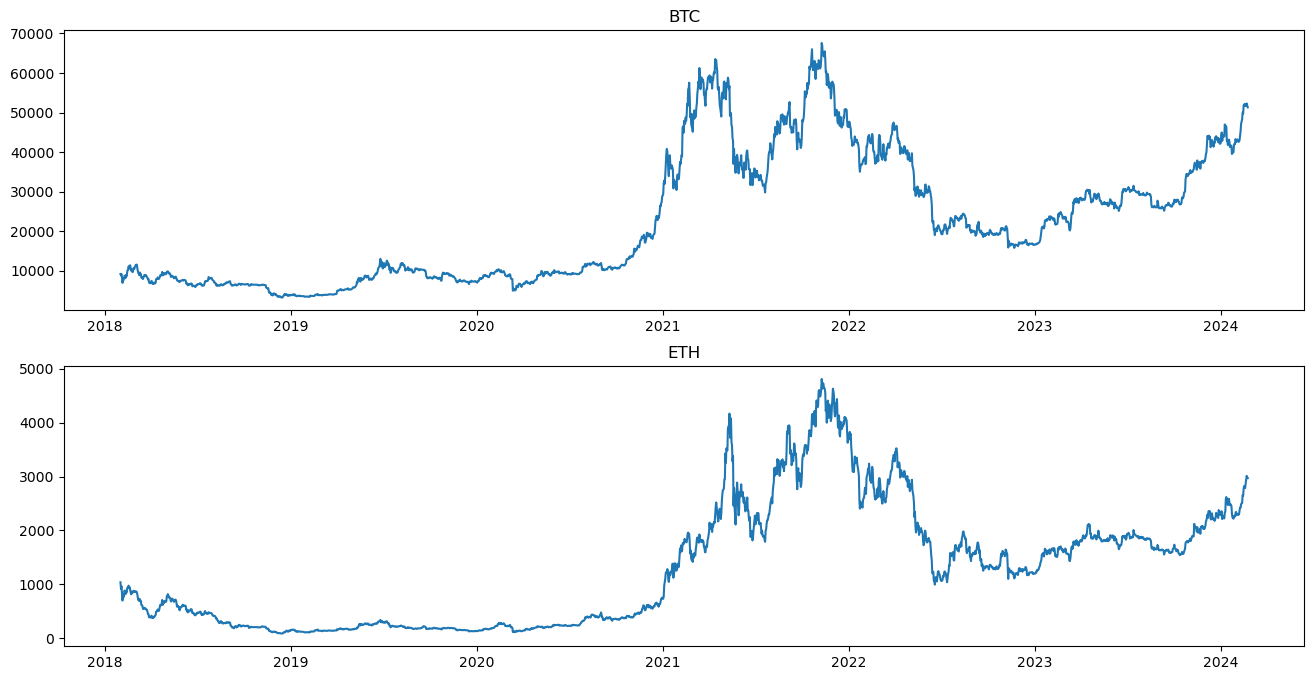

In [335]:
fig, axs =plt.subplots(2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(adj_close['BTC-USD'])
axs[0].set_title('BTC')
axs[1].plot(adj_close['ETH-USD'])
axs[1].set_title('ETH')
plt.show()

# Moving Average

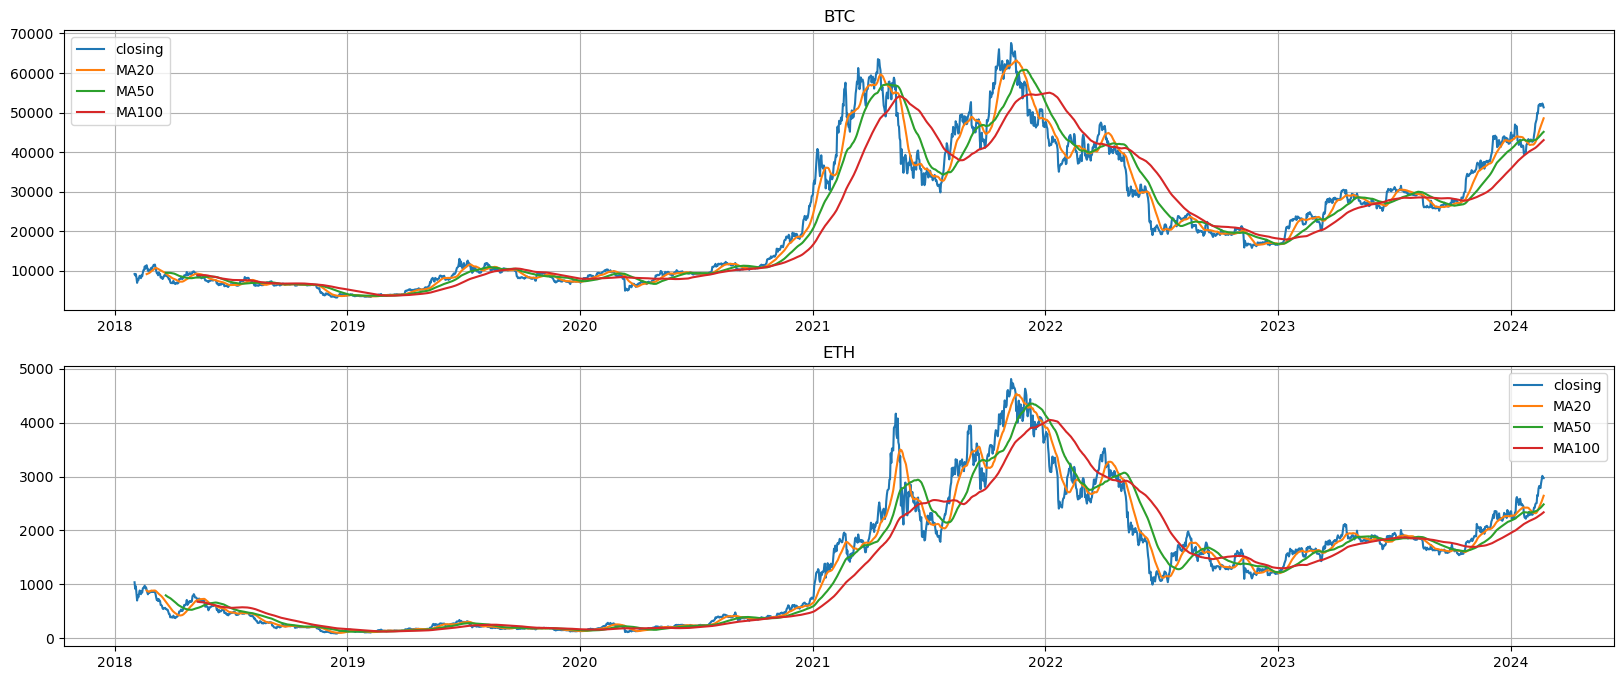

In [336]:
MA20 = adj_close.rolling(20).mean()
MA50 = adj_close.rolling(50).mean()
MA100 = adj_close.rolling(100).mean()

fig, axs = plt.subplots(2,figsize=(20,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(adj_close['BTC-USD'], label= 'closing')
axs[0].plot(MA20['BTC-USD'], label= 'MA20')
axs[0].plot(MA50['BTC-USD'], label= 'MA50')
axs[0].plot(MA100['BTC-USD'], label= 'MA100')
axs[0].set_title('BTC')
axs[0].legend()
axs[0].grid(True)
axs[1].plot(adj_close['ETH-USD'], label= 'closing')
axs[1].plot(MA20['ETH-USD'], label= 'MA20')
axs[1].plot(MA50['ETH-USD'], label= 'MA50')
axs[1].plot(MA100['ETH-USD'], label= 'MA100')
axs[1].set_title('ETH')
axs[1].legend()
plt.grid(True)
plt.show()

# Golden/Death Cross

In [337]:
SMA50 = adj_close.rolling(window = 50, min_periods = 1).mean()
SMA200 = adj_close.rolling(window = 200, min_periods = 1).mean()

In [338]:
btc_crossings_50_200 = np.where(np.logical_xor(SMA50['BTC-USD'] > SMA200['BTC-USD'], SMA50['BTC-USD'].shift(1) > SMA200['BTC-USD'].shift(1)))[0]
eth_crossings_50_200 = np.where(np.logical_xor(SMA50['ETH-USD'] > SMA200['ETH-USD'], SMA50['ETH-USD'].shift(1) > SMA200['ETH-USD'].shift(1)))[0]

btc_buying_50_200 = np.where((SMA50['BTC-USD'] > SMA200['BTC-USD']) & (SMA50['BTC-USD'].shift(1) <= SMA200['BTC-USD'].shift(1)))[0]
btc_selling_50_200 = np.where((SMA50['BTC-USD'] <= SMA200['BTC-USD']) & (SMA50['BTC-USD'].shift(1) > SMA200['BTC-USD'].shift(1)))[0]

eth_buying_50_200 = np.where((SMA50['ETH-USD'] > SMA200['ETH-USD']) & (SMA50['ETH-USD'].shift(1) <= SMA200['ETH-USD'].shift(1)))[0]
eth_selling_50_200 = np.where((SMA50['ETH-USD'] <= SMA200['ETH-USD']) & (SMA50['ETH-USD'].shift(1) > SMA200['ETH-USD'].shift(1)))[0]


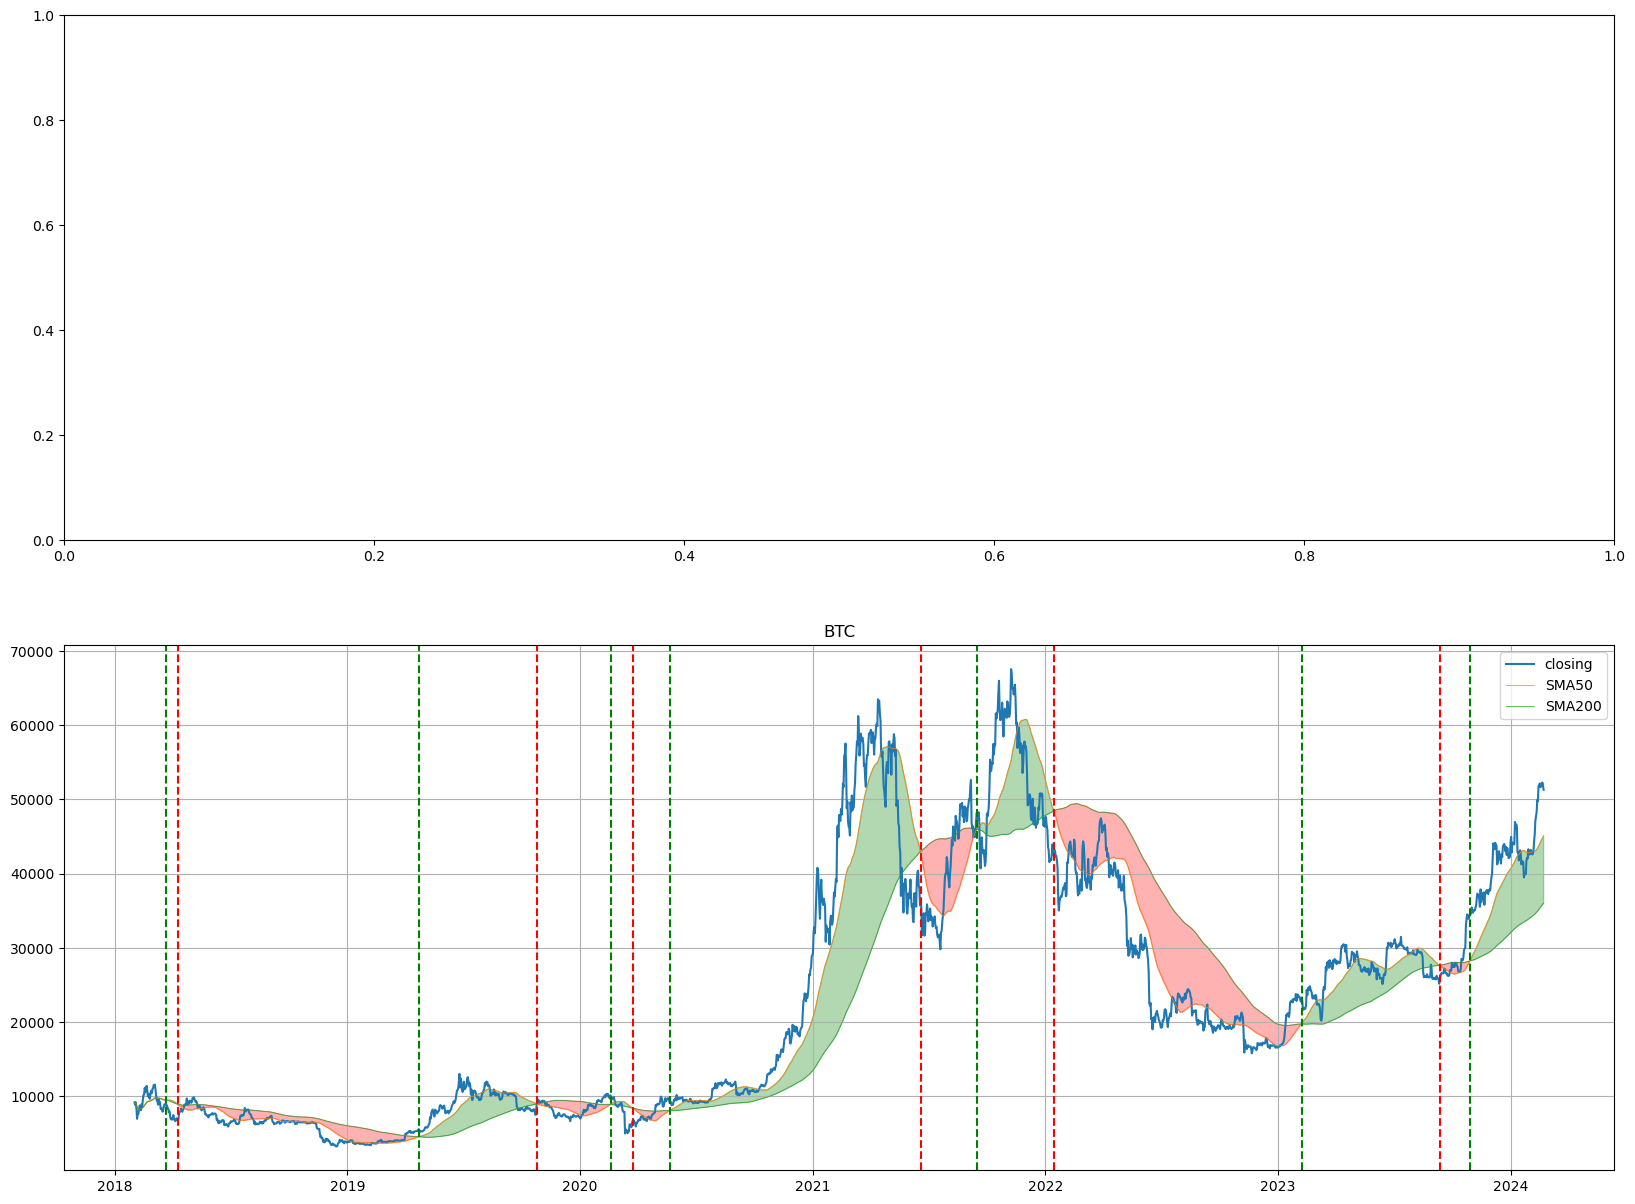

In [344]:
fig, axs = plt.subplots(2,figsize=(20,15),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
plt.plot(adj_close['BTC-USD'], label= 'closing')
plt.plot(SMA50['BTC-USD'], label= 'SMA50', linewidth = 0.5)
plt.plot(SMA200['BTC-USD'], label= 'SMA200', linewidth = 0.5)
plt.title('BTC')
plt.legend()
plt.grid(True)
plt.fill_between(adj_close.index, SMA50['BTC-USD'], SMA200['BTC-USD'], where=(SMA50['BTC-USD'] > SMA200['BTC-USD']), color='green', alpha=0.3)
plt.fill_between(adj_close.index, SMA50['BTC-USD'], SMA200['BTC-USD'], where=(SMA50['BTC-USD'] <= SMA200['BTC-USD']), color='red', alpha=0.3)

for buying in btc_buying_50_200:
    plt.axvline(x=SMA50.index[buying], color='g', linestyle='--')

for selling in btc_selling_50_200:
    plt.axvline(x=SMA50.index[selling], color='r', linestyle='--')
    
plt.show()

In [305]:
print(btc_buying_50_200, btc_selling_50_200)

[  50  447  748  840 1322 1832 2097] [  68  632  783 1234 1443 2049]


In [306]:
btc_selling_50_200 = btc_selling_50_200.tolist()
btc_buying_50_200 = btc_buying_50_200.tolist()

In [307]:
btc_selling_50_200.append(-1)

In [308]:
def profit_calc(buying, selling, slope_btc):
    seed = 1000000
    past_seed = seed
    btc = 0
    coins = 0
    buy_price = 0
    sell_price = 0
    short_start_price = 0
    short_end_price = 0
    
    for i in range(len(buying)):
        
        buy_price = slope_btc.iloc[buying[i]]['BTC-USD']
        coins = seed/buy_price
        btc += coins
        seed -= buy_price*coins
        
        print('buying at ', buying[i], buy_price, '. current seed: ', seed, ', current btc: ', btc)
        
        sell_price = slope_btc.iloc[selling[i]]['BTC-USD']
        seed += sell_price*btc
        btc = 0
        
        print('selling at ', selling[i], sell_price, '. current seed: ', seed, ', current btc: ', btc)
        print('profit: ', ((seed - past_seed)/1000000)*100)
        past_seed = seed
        
        if (i != len(buying)-1):
            short_start_price = slope_btc.iloc[selling[i]]['BTC-USD']
            coins = 1000000/short_start_price
            btc -= coins
            seed += 1000000
            
            print('shorting start at ', selling[i], short_start_price, '. current seed: ', seed, ', current btc: ', btc)
            
            short_end_price = slope_btc.iloc[buying[i+1]]['BTC-USD']
            seed -= short_end_price*abs(btc)
            btc = 0
            
            print('shorting end at ', buying[i+1], short_end_price, '. current seed: ', seed, ', current btc: ', btc)
            print('profit: ', ((seed - past_seed)/1000000)*100)
        past_seed = seed
        
    return ((seed-1000000)/1000000) *100

In [309]:
profit_calc(btc_buying_50_200, btc_selling_50_200, adj_close)

buying at  50 8879.6201171875 . current seed:  0.0 , current btc:  112.6174303407854
selling at  68 6834.759765625 . current seed:  769713.0818012762 , current btc:  0
profit:  -23.028691819872382
shorting start at  68 6834.759765625 . current seed:  1769713.0818012762 , current btc:  -146.3109215673443
shorting end at  447 5464.86669921875 . current seed:  970143.3987958899 , current btc:  0
profit:  20.043031699461373
buying at  447 5464.86669921875 . current seed:  0.0 , current btc:  177.52370774836655
selling at  632 9244.97265625 . current seed:  1641201.823969765 , current btc:  0
profit:  67.10584251738752
shorting start at  632 9244.97265625 . current seed:  2641201.823969765 , current btc:  -108.16689645090047
shorting end at  748 9633.38671875 . current seed:  1599188.2802912542 , current btc:  0
profit:  -4.201354367851094
buying at  748 9633.38671875 . current seed:  0.0 , current btc:  166.00478388131813
selling at  783 6681.06298828125 . current seed:  1109088.4174671024

308.34358802467324

In [310]:
adj_close.iloc[1461]

BTC-USD    38743.273438
ETH-USD     2792.117188
Name: 2022-02-01 00:00:00, dtype: float64

In [311]:
mod_btc_selling_50_200 = btc_selling_50_200.copy()
mod_btc_buying_50_200 = btc_buying_50_200.copy()

In [312]:
print(mod_btc_buying_50_200, mod_btc_selling_50_200)

[50, 447, 748, 840, 1322, 1832, 2097] [68, 632, 783, 1234, 1443, 2049, -1]


In [313]:
mod_btc_selling_50_200.insert(-3, 1461)
mod_btc_selling_50_200 = mod_btc_selling_50_200[-3:]

mod_btc_buying_50_200 = mod_btc_buying_50_200[-2:]

In [314]:
print(mod_btc_buying_50_200, mod_btc_selling_50_200)

[1832, 2097] [1443, 2049, -1]


In [381]:
def profit_calc_new(buying, selling, slope_btc):
    seed = 1000000
    past_seed = seed
    btc = 0
    coins = 0
    buy_price = 0
    sell_price = 0
    short_start_price = 0
    short_end_price = 0
    
    for i in range(len(buying)):
        
        short_start_price = slope_btc.iloc[selling[i]]['BTC-USD']
        coins = 1000000/short_start_price
        btc -= coins
        seed += 1000000
            
        print('shorting start at ', selling[i], short_start_price, '. current seed: ', seed, ', current btc: ', btc)
            
        short_end_price = slope_btc.iloc[buying[i]]['BTC-USD']
        seed -= short_end_price*abs(btc)
        btc = 0
            
        print('shorting end at ', buying[i], short_end_price, '. current seed: ', seed, ', current btc: ', btc)
        print('profit: ', ((seed - past_seed)/1000000)*100)
        past_seed = seed
        
        buy_price = slope_btc.iloc[buying[i]]['BTC-USD']
        coins = seed/buy_price
        btc += coins
        seed -= buy_price*coins
        
        print('buying at ', buying[i], buy_price, '. current seed: ', seed, ', current btc: ', btc)
        
        sell_price = slope_btc.iloc[selling[i+1]]['BTC-USD']
        seed += sell_price*btc
        btc = 0
        
        print('selling at ', selling[i], sell_price, '. current seed: ', seed, ', current btc: ', btc)
        print('profit: ', ((seed-past_seed)/1000000)*100)
        past_seed = seed
        
    return ((seed-1000000)/1000000) *100

In [316]:
profit_calc_new(mod_btc_buying_50_200, mod_btc_selling_50_200, adj_close)

shorting start at  1443 43099.69921875 . current seed:  2000000 , current btc:  -23.202018068027773
shorting end at  1832 23264.291015625 . current seed:  1460221.4995156126 , current btc:  0
profit:  46.02214995156126
buying at  1832 23264.291015625 . current seed:  0.0 , current btc:  62.76664517886592
selling at  1443 25833.34375 . current seed:  1621472.3209399236 , current btc:  0
profit:  16.1250821424311
shorting start at  2049 25833.34375 . current seed:  2621472.3209399236 , current btc:  -38.70966181062024
shorting end at  2097 34502.36328125 . current seed:  1285897.5066555745 , current btc:  0
profit:  -33.55748142843491
buying at  2097 34502.36328125 . current seed:  0.0 , current btc:  37.26983847956827
selling at  2049 51304.97265625 . current seed:  1912128.0440971043 , current btc:  0
profit:  62.623053744152976


91.21280440971043

# slope momentum

In [345]:
slope_SMA50_btc = (SMA50['BTC-USD'].diff()).rename('Slope_SMA50_BTC')
slope_SMA200_btc = (SMA200['BTC-USD'].diff()).rename('Slope_SMA200_BTC')

#slope_ema12_eth = (EMA12['ETH-USD'].diff() / time_interval).rename('Slope_EMA12_ETH')
#slope_ema26_eth = (EMA26['ETH-USD'].diff() / time_interval).rename('Slope_EMA26_ETH')

slope_diff_btc = slope_SMA50_btc - slope_SMA200_btc
#slope_diff_eth = slope_ema12_eth - slope_ema26_eth

#btc_buying = ((EMA12['BTC-USD'] > EMA26['BTC-USD']) & (EMA12['BTC-USD'].shift(1) <= EMA26['BTC-USD'].shift(1))).astype(int)
#eth_buying = ((EMA12['ETH-USD'] > EMA26['ETH-USD']) & (EMA12['ETH-USD'].shift(1) <= EMA26['ETH-USD'].shift(1))).astype(int)

#slope_diff_change_btc = slope_diff_btc.groupby(btc_buying.cumsum()).diff()
#slope_diff_change_eth = slope_diff_eth.groupby(eth_buying.cumsum()).diff()

#slope_diff_change_df = pd.concat([slope_diff_change_btc.rename('Slope_Diff_BTC'), slope_diff_change_eth.rename('Slope_Diff_ETH')], axis=1)

print(slope_diff_btc)


Date
2018-02-01          NaN
2018-02-02     0.000000
2018-02-03     0.000000
2018-02-04     0.000000
2018-02-05     0.000000
                ...    
2024-02-18    84.459951
2024-02-19    77.276816
2024-02-20    46.296943
2024-02-21    23.638955
2024-02-22    57.820352
Length: 2213, dtype: float64


In [365]:
slope_price = pd.concat([slope_diff_btc, adj_close['BTC-USD']], axis = 1)
slope_price[0]

Date
2018-02-01          NaN
2018-02-02     0.000000
2018-02-03     0.000000
2018-02-04     0.000000
2018-02-05     0.000000
                ...    
2024-02-18    84.459951
2024-02-19    77.276816
2024-02-20    46.296943
2024-02-21    23.638955
2024-02-22    57.820352
Name: 0, Length: 2213, dtype: float64

In [375]:
slp_buying = []
slp_selling = []

for i in range(1, len(slope_price)):
    prev_value = slope_price.iloc[i - 1][0]
    curr_value = slope_price.iloc[i][0]
    
    if prev_value > 0 and curr_value <= 0:
        slp_selling.append(i)
    elif prev_value < 0 and curr_value >= 0:
        slp_buying.append(i)

In [376]:
for i in range(47):
    print(slp_buying[i], slp_selling[i])

62 61
87 63
91 88
101 99
124 123
166 126
172 171
191 190
231 220
256 254
267 257
342 288
346 343
532 530
537 536
679 555
705 681
817 766
872 870
880 874
907 881
994 957
1124 1121
1168 1156
1270 1172
1281 1279
1336 1335
1488 1398
1497 1491
1526 1525
1542 1538
1580 1557
1641 1581
1704 1703
1762 1761
1779 1778
1786 1780
1791 1787
1866 1862
1975 1920
1982 1981
1985 1984
1988 1987
2000 1991
2005 2001
2073 2015
2202 2180


In [377]:
slp_buying[27]

1488

In [378]:
slp_buying = slp_buying[27:]
slp_buying

[1488,
 1497,
 1526,
 1542,
 1580,
 1641,
 1704,
 1762,
 1779,
 1786,
 1791,
 1866,
 1975,
 1982,
 1985,
 1988,
 2000,
 2005,
 2073,
 2202]

In [379]:
slp_selling = slp_selling[28:]
slp_selling.insert(0, 1461)
slp_selling.append(-1)
slp_selling

[1461,
 1491,
 1525,
 1538,
 1557,
 1581,
 1703,
 1761,
 1778,
 1780,
 1787,
 1862,
 1920,
 1981,
 1984,
 1987,
 1991,
 2001,
 2015,
 2180,
 -1]

In [380]:
for i in range(len(slp_buying)):
    print(slp_selling[i], slp_buying[i])

1461 1488
1491 1497
1525 1526
1538 1542
1557 1580
1581 1641
1703 1704
1761 1762
1778 1779
1780 1786
1787 1791
1862 1866
1920 1975
1981 1982
1984 1985
1987 1988
1991 2000
2001 2005
2015 2073
2180 2202


In [382]:
profit_calc_new(slp_buying, slp_selling, adj_close)

shorting start at  1461 38743.2734375 . current seed:  2000000 , current btc:  -25.810932099301915
shorting end at  1488 43193.234375 . current seed:  885142.3603976415 , current btc:  0
profit:  -11.485763960235845
buying at  1488 43193.234375 . current seed:  0.0 , current btc:  20.492615873886884
selling at  1461 42451.7890625 . current seed:  869948.2064170851 , current btc:  0
profit:  -1.519415398055641
shorting start at  1491 42451.7890625 . current seed:  1869948.2064170851 , current btc:  -23.556133253365168
shorting end at  1497 41982.92578125 . current seed:  880992.8123478201 , current btc:  0
profit:  1.1044605930735008
buying at  1497 41982.92578125 . current seed:  0.0 , current btc:  20.984550170185624
selling at  1491 43206.73828125 . current seed:  906673.9671529704 , current btc:  0
profit:  2.568115480515023
shorting start at  1525 43206.73828125 . current seed:  1906673.9671529704 , current btc:  -23.144538092428977
shorting end at  1526 43503.84765625 . current se

18.693403185343044